In [262]:
# Тема “Обучение без учителя”

# Задание 1
# Импортируйте библиотеки pandas, numpy и matplotlib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [263]:
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [264]:
# Создайте датафреймы X и y из этих данных.
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [265]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
# с помощью функции train_test_split так, чтобы размер тестовой выборки
# составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42)

In [266]:
# Масштабируйте данные с помощью StandardScaler.
scaler = StandardScaler()

In [267]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [268]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [269]:
# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.
tsne_model = TSNE(
    n_components=2, 
    learning_rate=250, 
    random_state=42
)

X_tsne_model = tsne_model.fit_transform(X_train_scaled, y_train)
X_tsne_model.shape

(486, 2)

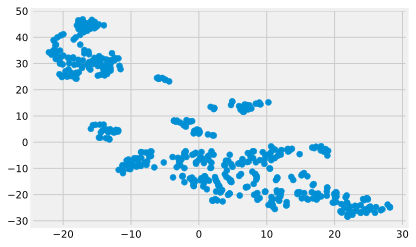

In [270]:
# Постройте диаграмму рассеяния на этих данных.
plt.scatter(X_tsne_model[:, 0], X_tsne_model[:, 1])

In [271]:
# Задание 2
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
# используйте все признаки из датафрейма X_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
KM_model = KMeans(
    n_clusters=3,
    max_iter=100, 
    random_state=42
)

KM_train_pred = KM_model.fit_predict(X_train)

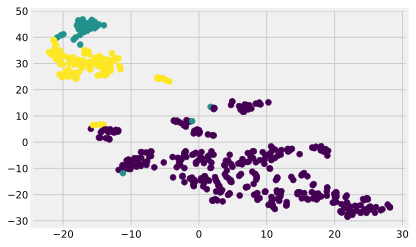

In [272]:
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
# и раскрасьте точки из разных кластеров разными цветами.
plt.scatter(
    X_tsne_model[:, 0], 
    X_tsne_model[:, 1],
    c=KM_train_pred
)

In [273]:
# Вычислите средние значения price и CRIM в разных кластерах.
for i in range(3):
    print(f'Среднее значение кластера price {i} = {y_train.loc[KM_train_pred == i, "price"].mean()}')
for i in range(3):
    print(f'Среднее значение кластера CRIM {i} = {X_train.loc[KM_train_pred == i, "CRIM"].mean()}')

Среднее значение кластера price 0 = 25.010481586402285
Среднее значение кластера price 1 = 13.291891891891892
Среднее значение кластера price 2 = 17.441666666666674
Среднее значение кластера CRIM 0 = 0.3833965155807366
Среднее значение кластера CRIM 1 = 14.393982432432432
Среднее значение кластера CRIM 2 = 11.201334895833334


In [274]:
# * Задание 3
# Примените модель KMeans, построенную в предыдущем задании,
# к данным из тестового набора.
KM_test_pred = KM_model.predict(X_test)

In [275]:
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
for i in range(3):
    print(f'Среднее значение кластера price {i} = {y_test.loc[KM_test_pred == i, "price"].mean()}')
for i in range(3):
    print(f'Среднее значение кластера CRIM {i} = {X_test.loc[KM_test_pred == i, "CRIM"].mean()}')

Среднее значение кластера price 0 = 22.792307692307695
Среднее значение кластера price 1 = 7.0
Среднее значение кластера price 2 = 17.233333333333334
Среднее значение кластера CRIM 0 = 0.14679615384615383
Среднее значение кластера CRIM 1 = 45.7461
Среднее значение кластера CRIM 2 = 6.2573333333333325
